In [ ]:
# Import the modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import kruskal
from scipy.stats import f_oneway



#### Data Preprocessing

In [2]:
df = pd.read_csv('_cancer_dataset_uae.csv')
df.head(10)

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160
5,PAT000006,41,Female,Emirati,Abu Dhabi,2015-02-10,Breast,I,Surgery,2015-04-21,Dubai Hospital,Dr. ZL30,Recovered,NaN,NaN,Smoker,Hypertension,European,59,176
6,PAT000007,20,Male,Emirati,Ras Al Khaimah,2023-02-27,Ovarian,IV,Chemotherapy,2023-05-15,Sheikh Khalifa Hospital,Dr. AL45,Recovered,NaN,NaN,Non-Smoker,Hypertension,Arab,66,155
7,PAT000008,39,Male,Expatriate,Sharjah,2018-04-05,Breast,I,Surgery,2018-08-10,Sheikh Khalifa Hospital,Dr. IL20,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,27,189
8,PAT000009,70,Female,Emirati,Umm Al Quwain,2022-12-12,Lung,III,Immunotherapy,2023-05-29,Dubai Hospital,Dr. KH33,Deceased,2024-12-22 00:00:00,Cancer,Non-Smoker,NaN,South Asian,60,162
9,PAT000010,19,Female,Emirati,Dubai,2018-05-29,Breast,I,Surgery,2018-07-25,Cleveland Clinic Abu Dhabi,Dr. GX45,Recovered,NaN,NaN,Non-Smoker,NaN,East Asian,73,180


In [3]:
df.shape

(10000, 20)

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isna().sum()

Patient_ID                 0
Age                        0
Gender                     0
Nationality                0
Emirate                    0
Diagnosis_Date             0
Cancer_Type                0
Cancer_Stage               0
Treatment_Type             0
Treatment_Start_Date       0
Hospital                   0
Primary_Physician          0
Outcome                    0
Death_Date              9008
Cause_of_Death          9008
Smoking_Status             0
Comorbidities           4047
Ethnicity                  0
Weight                     0
Height                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

In [7]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Nationality', 'Emirate',
       'Diagnosis_Date', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Type',
       'Treatment_Start_Date', 'Hospital', 'Primary_Physician', 'Outcome',
       'Death_Date', 'Cause_of_Death', 'Smoking_Status', 'Comorbidities',
       'Ethnicity', 'Weight', 'Height'],
      dtype='object')

##### Checking for the inconsistencies in Age column

In [8]:
df['Age'].value_counts()

Age
34    175
43    163
36    159
71    159
38    157
     ... 
31    122
67    120
24    117
51    116
22    113
Name: count, Length: 72, dtype: int64

In [9]:
df['Age'].unique()

array([69, 32, 89, 78, 38, 41, 20, 39, 70, 19, 47, 55, 81, 77, 50, 75, 66,
       76, 59, 79, 64, 68, 72, 24, 56, 35, 21, 31, 26, 88, 61, 25, 52, 53,
       67, 23, 71, 80, 51, 65, 57, 43, 58, 46, 62, 82, 18, 28, 22, 45, 29,
       40, 54, 44, 60, 30, 49, 83, 74, 87, 73, 36, 85, 34, 86, 33, 37, 84,
       48, 42, 63, 27])

In [10]:
df['Age'].dtype

dtype('int64')

In [11]:
df['Age'].isna().sum()

np.int64(0)

##### Cleaning the Gender column

In [12]:
df['Gender'].value_counts()

Gender
Female    4985
Male      4827
Other      188
Name: count, dtype: int64

In [13]:
df['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [14]:
df['Gender'].dtype

dtype('O')

In [15]:
df['Gender'].isna().sum()

np.int64(0)

##### Checking for the inconsistencies in the Nationality column

In [16]:
df['Nationality'].value_counts()

Nationality
Emirati       5920
Expatriate    4080
Name: count, dtype: int64

In [17]:
df['Nationality'].unique()

array(['Emirati', 'Expatriate'], dtype=object)

In [18]:
df['Nationality'].dtype

dtype('O')

In [19]:
df['Nationality'].isna().sum()

np.int64(0)

##### Exploring the Emirate column

In [20]:
df['Emirate'].value_counts()

Emirate
Ajman             1497
Fujairah          1471
Abu Dhabi         1471
Umm Al Quwain     1432
Dubai             1407
Sharjah           1382
Ras Al Khaimah    1340
Name: count, dtype: int64

In [21]:
df['Emirate'].unique()

array(['Umm Al Quwain', 'Abu Dhabi', 'Fujairah', 'Ras Al Khaimah',
       'Sharjah', 'Dubai', 'Ajman'], dtype=object)

In [22]:
df['Emirate'].dtype

dtype('O')

In [23]:
df['Emirate'].isna().sum()

np.int64(0)

##### Diagnosis_Date column

In [24]:
df['Diagnosis_Date'].value_counts()

Diagnosis_Date
2023-12-13    12
2022-01-16    10
2020-10-29    10
2023-07-14    10
2017-08-11    10
              ..
2019-09-23     1
2019-01-12     1
2022-07-13     1
2020-07-09     1
2019-01-24     1
Name: count, Length: 3151, dtype: int64

In [25]:
df['Diagnosis_Date'].unique()

array(['2020-11-30', '2015-10-10', '2018-02-13', ..., '2019-06-21',
       '2022-09-18', '2016-06-11'], shape=(3151,), dtype=object)

In [26]:
df['Diagnosis_Date'].dtype

dtype('O')

In [27]:
df['Diagnosis_Date'].isna().sum()

np.int64(0)

##### Cancer_Type column

In [28]:
df['Cancer_Type'].value_counts()

Cancer_Type
Leukemia      1314
Liver         1263
Ovarian       1259
Pancreatic    1243
Breast        1241
Lung          1233
Colorectal    1226
Prostate      1221
Name: count, dtype: int64

In [29]:
df['Cancer_Type'].unique()

array(['Liver', 'Leukemia', 'Lung', 'Pancreatic', 'Breast', 'Ovarian',
       'Prostate', 'Colorectal'], dtype=object)

In [30]:
df['Cancer_Type'].dtype

dtype('O')

In [31]:
df['Cancer_Type'].isna().sum()

np.int64(0)

##### Treatment_Type column

In [32]:
df['Treatment_Type'].unique()

array(['Radiation', 'Surgery', 'Chemotherapy', 'Immunotherapy'],
      dtype=object)

In [33]:
df['Treatment_Type'].value_counts()

Treatment_Type
Radiation        2519
Surgery          2498
Immunotherapy    2497
Chemotherapy     2486
Name: count, dtype: int64

In [34]:
df['Treatment_Type'].dtype

dtype('O')

In [35]:
df['Treatment_Type'].isna().sum()

np.int64(0)

##### Treatment_Start_Day column

In [36]:
df['Treatment_Start_Date'].unique()

array(['2020-12-04', '2015-11-05', '2018-08-03', ..., '2024-06-02',
       '2016-09-16', '2017-12-23'], shape=(3250,), dtype=object)

In [37]:
df['Treatment_Start_Date'].value_counts()

Treatment_Start_Date
2022-05-17    12
2020-09-30    10
2020-03-23    10
2022-11-24    10
2016-10-13     9
              ..
2022-04-12     1
2015-05-18     1
2023-03-08     1
2015-02-08     1
2019-12-09     1
Name: count, Length: 3250, dtype: int64

In [38]:
df['Treatment_Start_Date'].dtypes

dtype('O')

In [39]:
df['Treatment_Start_Date'].isna().sum()

np.int64(0)

##### Hospital column

In [40]:
df['Hospital'].unique()

array(['Sheikh Khalifa Hospital', 'Dubai Hospital',
       'Zayed Military Hospital', 'Cleveland Clinic Abu Dhabi'],
      dtype=object)

In [41]:
df['Hospital'].value_counts()

Hospital
Sheikh Khalifa Hospital       2541
Cleveland Clinic Abu Dhabi    2535
Dubai Hospital                2467
Zayed Military Hospital       2457
Name: count, dtype: int64

In [42]:
df['Hospital'].dtype

dtype('O')

In [43]:
df['Hospital'].isna().sum()

np.int64(0)

##### Primary_Pysician column

In [44]:
df['Primary_Physician'].unique()

array(['Dr. VO41', 'Dr. SM31', 'Dr. BC7', ..., 'Dr. WT6', 'Dr. JB17',
       'Dr. SI45'], shape=(8614,), dtype=object)

In [45]:
df['Primary_Physician'].value_counts()

Primary_Physician
Dr. AJ25    5
Dr. ZA47    5
Dr. ZI28    4
Dr. AX14    4
Dr. BG6     4
           ..
Dr. IL20    1
Dr. KH33    1
Dr. GX45    1
Dr. UI2     1
Dr. MP30    1
Name: count, Length: 8614, dtype: int64

In [46]:
df['Primary_Physician'].dtype

dtype('O')

In [47]:
df['Primary_Physician'].isna().sum()

np.int64(0)

##### Outcome column

In [48]:
df['Outcome'].unique()

array(['Recovered', 'Under Treatment', 'Deceased'], dtype=object)

In [49]:
df['Outcome'].value_counts()

Outcome
Recovered          4931
Under Treatment    4077
Deceased            992
Name: count, dtype: int64

In [50]:
df['Outcome'].isna().sum()

np.int64(0)

In [51]:
df['Outcome'].dtype

dtype('O')

##### Death_Date Column

In [52]:
df['Death_Date'].unique()

array([nan, '2024-12-22 00:00:00', '2022-08-01 00:00:00',
       '2020-03-31 00:00:00', '2023-05-18 00:00:00',
       '2022-07-29 00:00:00', '2019-03-12 00:00:00',
       '2018-04-15 00:00:00', '2020-09-18 00:00:00',
       '2020-06-16 00:00:00', '2023-01-11 00:00:00',
       '2024-11-20 00:00:00', '2018-05-09 00:00:00',
       '2023-08-11 00:00:00', '2020-07-10 00:00:00',
       '2020-07-29 00:00:00', '2018-05-29 00:00:00',
       '2018-09-09 00:00:00', '2022-04-24 00:00:00',
       '2017-09-27 00:00:00', '2020-07-19 00:00:00',
       '2018-03-03 00:00:00', '2016-09-24 00:00:00',
       '2021-01-28 00:00:00', '2021-11-15 00:00:00',
       '2018-01-27 00:00:00', '2021-05-23 00:00:00',
       '2017-01-28 00:00:00', '2024-12-11 00:00:00',
       '2022-04-13 00:00:00', '2022-11-19 00:00:00',
       '2017-08-13 00:00:00', '2023-09-25 00:00:00',
       '2019-11-16 00:00:00', '2016-05-25 00:00:00',
       '2022-09-13 00:00:00', '2021-08-06 00:00:00',
       '2017-12-03 00:00:00', '2020-05-06

In [53]:
df['Death_Date'].value_counts()

Death_Date
2019-01-27 00:00:00    3
2021-11-15 00:00:00    3
2024-02-05 00:00:00    3
2022-06-28 00:00:00    3
2024-01-14 00:00:00    3
                      ..
2017-04-22 00:00:00    1
2022-12-19 00:00:00    1
2025-04-25 00:00:00    1
2024-07-03 00:00:00    1
2024-03-28 00:00:00    1
Name: count, Length: 867, dtype: int64

In [54]:
df.Death_Date.isna().sum()

np.int64(9008)

**Key Insight**
###### The Death_Date column has more than 90% missing values, thus, it is should be dropped.

##### Cause_of_Death column

In [55]:
df.Cause_of_Death.unique()

array([nan, 'Cancer', 'Complications'], dtype=object)

In [56]:
df['Cause_of_Death'].value_counts()

Cause_of_Death
Complications    507
Cancer           485
Name: count, dtype: int64

In [57]:
df['Cause_of_Death'].dtypes

dtype('O')

In [58]:
df['Cause_of_Death'].isna().sum()

np.int64(9008)

**Key Insight**
###### The Cause_of_Death column contains more than 90% missing values (NaN), so it should be dropped.

##### Smoking_Status column

In [59]:
df['Smoking_Status'].unique()

array(['Non-Smoker', 'Smoker', 'Former Smoker'], dtype=object)

In [60]:
df['Smoking_Status'].value_counts()

Smoking_Status
Non-Smoker       5038
Smoker           3045
Former Smoker    1917
Name: count, dtype: int64

In [61]:
df['Smoking_Status'].dtypes

dtype('O')

In [62]:
df['Smoking_Status'].isna().sum()

np.int64(0)

##### Comorbidities column

In [63]:
df['Comorbidities'].unique()

array([nan, 'Hypertension', 'Cardiovascular Disease', 'Diabetes'],
      dtype=object)

In [64]:
df['Comorbidities'].value_counts()

Comorbidities
Hypertension              2945
Diabetes                  2005
Cardiovascular Disease    1003
Name: count, dtype: int64

In [65]:
df['Comorbidities'].dtypes

dtype('O')

In [66]:
df['Comorbidities'].isna().sum()

np.int64(4047)

In [67]:
# Fill missing values in comorbities column with unknown
df['Comorbidities'] = df['Comorbidities'].fillna('unknown')

# To confirm if the missing values were filled
df['Comorbidities'].isna().sum()

np.int64(0)

##### Ethnicity column

In [68]:
df['Ethnicity'].unique()

array(['European', 'South Asian', 'African', 'East Asian', 'Arab'],
      dtype=object)

In [69]:
df['Ethnicity'].value_counts()

Ethnicity
South Asian    2083
African        1988
European       1983
Arab           1983
East Asian     1963
Name: count, dtype: int64

In [70]:
df['Ethnicity'].dtype

dtype('O')

In [71]:
df['Ethnicity'].isna().sum()

np.int64(0)

##### Height column

In [72]:
df['Height'].unique()

array([157, 175, 155, 160, 176, 189, 162, 180, 173, 166, 168, 171, 174,
       169, 178, 179, 156, 172, 159, 177, 161, 188, 167, 165, 170, 164,
       191, 192, 181, 187, 144, 183, 149, 163, 182, 184, 185, 138, 152,
       195, 158, 199, 194, 186, 198, 193, 151, 148, 150, 154, 146, 143,
       142, 153, 147, 190, 145, 202, 196, 141, 197, 132, 139, 208, 201,
       200, 136, 137, 204, 140, 206, 131])

In [73]:
df['Height'].value_counts()

Height
171    437
170    414
168    410
169    403
167    394
      ... 
139      1
208      1
204      1
206      1
131      1
Name: count, Length: 72, dtype: int64

In [74]:
df['Height'].dtypes

dtype('int64')

In [75]:
df['Height'].isna().sum()

np.int64(0)

##### Weight column

In [76]:
df['Weight'].unique()

array([ 61,  80,  50,  44, 101,  59,  66,  27,  60,  73,  48,  71,  67,
        84,  83,  88,  82,  56,  75,  64,  85,  72,  45,  77,  55,  76,
        89,  49,  99,  81,  78,  94,  95,  87,  53,  70,  41,  39,  57,
        51,  97,  65,  63,  96,  74,  68,  36,  58,  38,  62,  79,  47,
        69,  52,  92,  86,  54, 100,  42,  91, 103,  90,  43,  34,  98,
        18,  40,  93,  37,  35, 117, 109,  46, 107, 106,  32, 102,  24,
        31,  33, 104, 105, 112,  28, 110,  29,  23, 118, 108,  30,  26,
       111, 114,  25, 122, 113, 116, 120,  19,  21,  22, 115])

In [77]:
df['Weight'].value_counts()

Weight
71     288
68     284
72     278
78     269
74     268
      ... 
113      2
19       2
120      1
22       1
115      1
Name: count, Length: 102, dtype: int64

In [78]:
df['Weight'].isna().sum()

np.int64(0)

In [79]:
df['Weight'].dtype

dtype('int64')

##### Cancer_Stage column

In [80]:
df['Cancer_Stage'].unique()

array(['II', 'III', 'I', 'IV'], dtype=object)

In [81]:
df['Cancer_Stage'].value_counts()

Cancer_Stage
III    3041
II     3036
I      2419
IV     1504
Name: count, dtype: int64

#### Exploratory Data Analysis

In [82]:
# Check for summary statistics
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,53.5397,20.757324,18.0,36.0,53.0,72.0,89.0
Weight,10000.0,69.5500,14.933339,18.0,60.0,70.0,80.0,122.0
Height,10000.0,169.3475,10.070118,131.0,163.0,169.0,176.0,208.0


**Key Insights**
###### From the above summary statistics, the minimum values of 18 kg for weight and 131 cm for height suggest possible outliers in those columns, which necessitates closer examination to understand the reasons behind these unusual entries. Meanwhile, the distribution of the Age column appears fairly symmetric, indicating no strong skewness and a relatively balanced spread around the mean.

##### Checking for possible outliers using boxplot

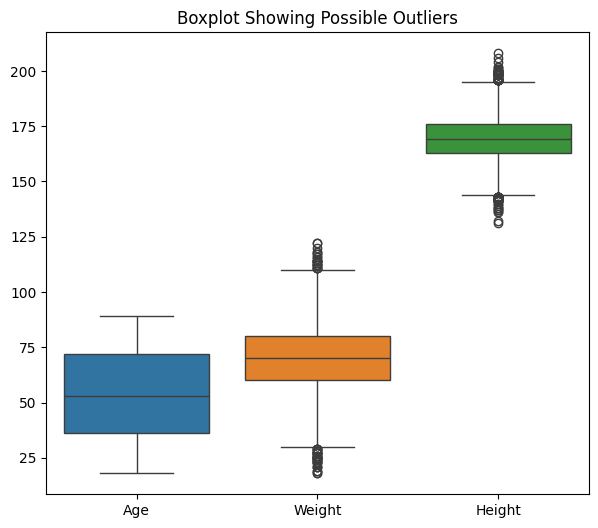

In [83]:
plt.figure(figsize=(7,6))
sns.boxplot(data=df[['Age','Weight','Height']])
plt.title('Boxplot Showing Possible Outliers')
plt.show()

**Key Insights**
###### There are outliers present in the Weight and Height columns, as shown in the boxplot above. No outliers are observed in the Age column.

In [84]:
# To clip the outliers in Weight and Height columns using IQR
# Weight column
Q1_weight = df['Weight'].quantile(0.25)
Q3_weight = df['Weight'].quantile(0.75)

# Find the inter quartile range for the weight variable
IQR_weight = Q3_weight - Q1_weight

# Find the upper and the lower bound for the height variable
lower_bound_weight = Q1_weight - 1.5*IQR_weight
upper_bound_weight = Q3_weight + 1.5*IQR_weight

# Clip the weight column outliers
df['Weight'] = df['Weight'].clip(lower=lower_bound_weight, upper=upper_bound_weight)

# Height column
Q1_height = df['Height'].quantile(0.25)
Q3_height = df['Height'].quantile(0.75)

# To find the inter quartile range for the height variable
IQR_height = Q3_height - Q1_height

# Find the upper and lower bounds for the height column
lower_bound_height = Q1_height - 1.5*IQR_height
upper_bound_height = Q3_height + 1.5*IQR_height

# Clip the height column outliers
df['Height'] = df['Height'].clip(lower=lower_bound_height, upper=upper_bound_height)

# # To filter rows where both weight and height columns are within bounds
# df_cleaned = df[
#     (df['Weight'] >= lower_bound_weight) & (df['Weight'] <= upper_bound_weight) &
#     (df['Height'] >= lower_bound_height) & (df['Height'] <= upper_bound_height)
#     ]







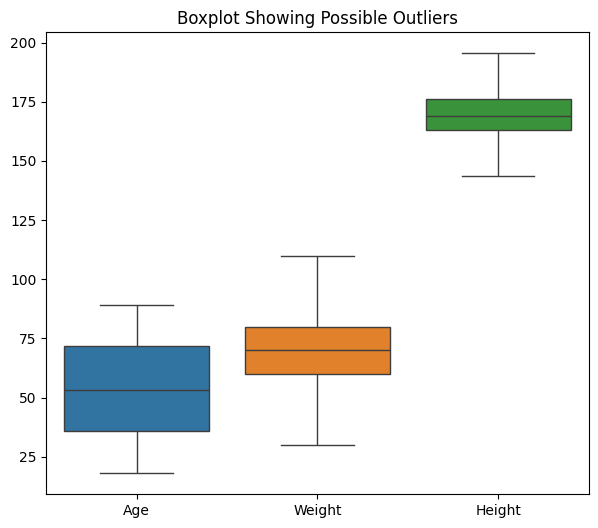

In [85]:
# To confirm if the outliers are completely removed
plt.figure(figsize=(7,6))
sns.boxplot(data=df[['Age','Weight','Height']])
plt.title('Boxplot Showing Possible Outliers')
plt.show()

**Key Insight**
###### Outliers were completely removed

##### Univariate Analysis

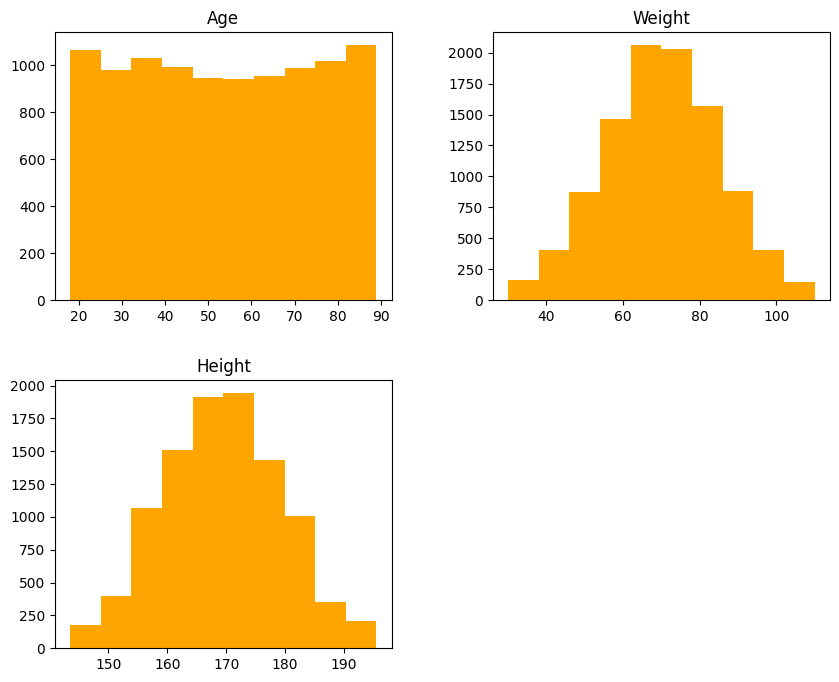

In [86]:

df.hist(figsize=(10,8), grid=False, color='orange')
plt.show()

**Key Insights**
###### The distribution of the Height and weight columns are approximately symmetric and follows a normal distribution while the Age column does not conform to a normal distribution; instead, it appears fairly uniform, with ages spread relatively evenly across the entire range.

##### Bivariate Analysis

In [87]:
var_cor = df.corr(numeric_only=True)
var_cor

,Age,Weight,Height
Age,1.000000,0.009453,-0.005784
Weight,0.009453,1.000000,0.014264
Height,-0.005784,0.014264,1.000000


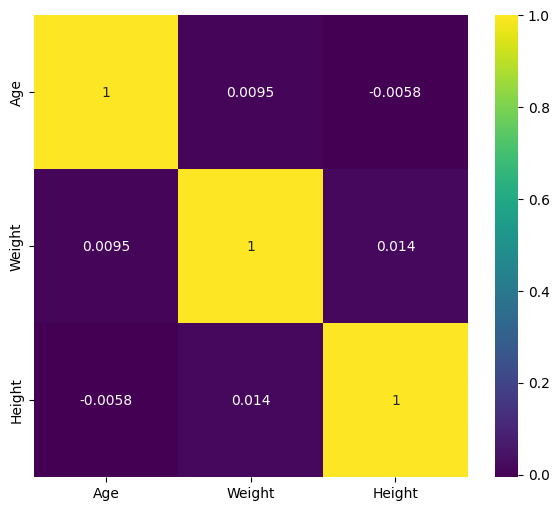

In [88]:
plt.figure(figsize=(7,6))
sns.heatmap(data=var_cor, annot=True, cmap='viridis')
plt.show()

**Key Insight**
###### The numerical variables exhibit only weak relationships, with no strong correlations among them

#####  Recovery Rates Over the Years

In [89]:
df['Diagnosis_Date'].dtypes

dtype('O')

In [90]:
# Convert the date column to a date format
df['Diagnosis_Date'] = pd.to_datetime(df['Diagnosis_Date'])

# To extra only the date 
#df['Diagnosis_Date'] = df['Diagnosis_Date'].dt.date

# Check for the data type 
df['Diagnosis_Date'].dtypes

# Extra the year from the Diagnosis_Date column
df['Diagnosis_Year'] = df['Diagnosis_Date'].dt.year

In [91]:
df['Diagnosis_Year'].unique()

array([2020, 2015, 2018, 2022, 2019, 2023, 2021, 2017, 2016, 2024],
      dtype=int32)

In [92]:
# Calculate the Recovery Rate by Year and pivot the table
cancer_outcome_by_year = df.groupby('Diagnosis_Year')['Outcome'].value_counts().unstack()
cancer_outcome_by_year.head()

Outcome,Deceased,Recovered,Under Treatment
Diagnosis_Year,,,
2015,117,556,448
2016,102,536,438
2017,107,497,452
2018,114,514,414
2019,96,532,450


In [93]:
# To find the Recovery Rate by Year
recovery_rate_year = cancer_outcome_by_year['Recovered']


print(recovery_rate_year)

Diagnosis_Year
2015    556
2016    536
2017    497
2018    514
2019    532
2020    566
2021    561
2022    559
2023    527
2024     83
Name: Recovered, dtype: int64


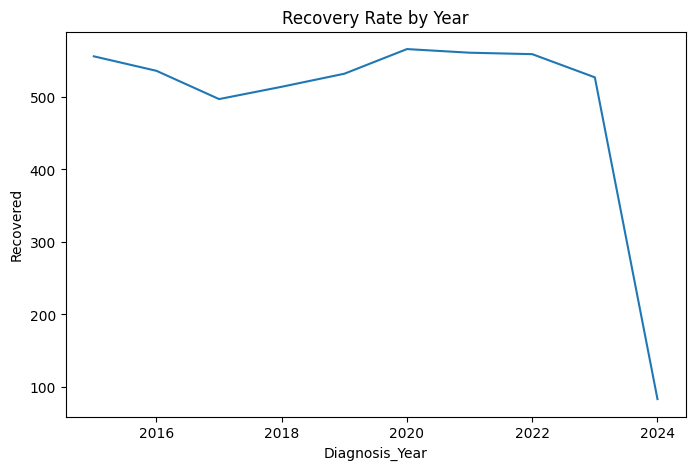

In [94]:
# Plot a chart to visualize the recovery rate by year
plt.figure(figsize=(8,5))
sns.lineplot(data=recovery_rate_year)
plt.title('Recovery Rate by Year')
plt.show()

#####  Recovery Rate per Cancer Type

In [95]:
# Check for the unique values in Cancer_Type column
df['Cancer_Type'].unique()

array(['Liver', 'Leukemia', 'Lung', 'Pancreatic', 'Breast', 'Ovarian',
       'Prostate', 'Colorectal'], dtype=object)

In [96]:
# Outcome by cancer_type table
cancer_outcome_by_type = df.groupby('Cancer_Type')['Outcome'].value_counts().unstack()
cancer_outcome_by_type.head()

Outcome,Deceased,Recovered,Under Treatment
Cancer_Type,,,
Breast,120,614,507
Colorectal,109,618,499
Leukemia,127,660,527
Liver,115,630,518
Lung,132,615,486


In [97]:
recovery_rate_by_cancer_type = cancer_outcome_by_type['Recovered']
print(recovery_rate_by_cancer_type)

Cancer_Type
Breast        614
Colorectal    618
Leukemia      660
Liver         630
Lung          615
Ovarian       601
Pancreatic    594
Prostate      599
Name: Recovered, dtype: int64


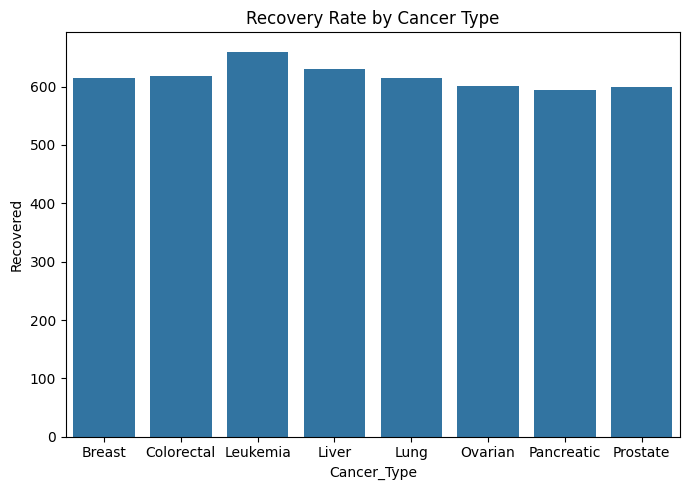

In [98]:
# Visualize the recovery rate by cancer_type
plt.figure(figsize=(7,5))
sns.barplot(data=recovery_rate_by_cancer_type)
plt.title('Recovery Rate by Cancer Type')
plt.xticks()
plt.tight_layout()
plt.show()

#####  The Impact of Smoking Status on Patient Outcomes

In [99]:
# Check for the unique values
df['Smoking_Status'].unique()

array(['Non-Smoker', 'Smoker', 'Former Smoker'], dtype=object)

In [100]:
df['Outcome'].unique()

array(['Recovered', 'Under Treatment', 'Deceased'], dtype=object)

In [102]:
# Using chi-square statistical testing
contingency_table = pd.crosstab(df['Smoking_Status'], df['Outcome'])

chi, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi Square-Value: {chi}")
print(f"P-Value: {p}")
alpha= 0.05
if p < alpha:
    print(f"Statistically, Smoking_Status has an impact on the Cancer_Type")
else:
    print(f"Statistically, Smoking_Status does not have an impact on the Cancer_Type")

Chi Square-Value: 1.6053980618120043
P-Value: 0.8078216076411294
Statistically, Smoking_Status does not have an impact on the Cancer_Type


In [103]:
# Show the contigency_table
contingency_table

Outcome,Deceased,Recovered,Under Treatment
Smoking_Status,,,
Former Smoker,195,929,793
Non-Smoker,492,2515,2031
Smoker,305,1487,1253


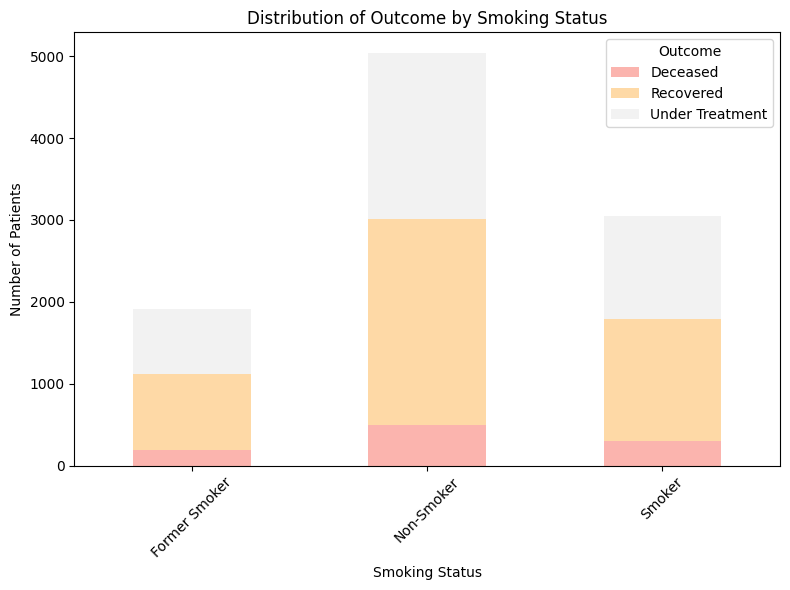

In [104]:
# To visualize the relationship between smoker_status and outcome
contingency_table.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Pastel1')

plt.title('Distribution of Outcome by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Patients')
plt.legend(title='Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### To identify the top 5 most common Cancer Types and evaluate their respective recovery rates

In [105]:
# Check the value counts for the cancer type categories
df['Cancer_Type'].value_counts()

Cancer_Type
Leukemia      1314
Liver         1263
Ovarian       1259
Pancreatic    1243
Breast        1241
Lung          1233
Colorectal    1226
Prostate      1221
Name: count, dtype: int64

In [106]:
# Top 5 cancer_type
df['Cancer_Type'].value_counts().head(5)

Cancer_Type
Leukemia      1314
Liver         1263
Ovarian       1259
Pancreatic    1243
Breast        1241
Name: count, dtype: int64

In [107]:
# To standardize  Cancer_Type column
df['Cancer_Type'] = df['Cancer_Type'].str.strip().str.lower()

# To get the top cancer type as index and convert to a list
top_5_cancer_type = df['Cancer_Type'].value_counts().head(5).index.tolist()

# To filter the top 5 cancer type dataframe
top_5_cancer_type_data = df[df['Cancer_Type'].isin(top_5_cancer_type)]

top_5_cancer_type_data


,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,...,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height,Diagnosis_Year
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,liver,II,Radiation,2020-12-04,...,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,unknown,European,61,157.0,2020
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,leukemia,III,Surgery,2015-11-05,...,Dr. SM31,Recovered,NaN,NaN,Smoker,unknown,South Asian,80,175.0,2015
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,liver,III,Radiation,2018-08-03,...,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,unknown,South Asian,50,175.0,2018
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,pancreatic,II,Chemotherapy,2020-02-29,...,Dr. YS37,Recovered,NaN,NaN,Former Smoker,unknown,East Asian,101,160.0,2019
5,PAT000006,41,Female,Emirati,Abu Dhabi,2015-02-10,breast,I,Surgery,2015-04-21,...,Dr. ZL30,Recovered,NaN,NaN,Smoker,Hypertension,European,59,176.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,PAT009992,54,Female,Emirati,Ajman,2022-02-14,breast,IV,Immunotherapy,2022-02-27,...,Dr. QS48,Deceased,2023-05-17 00:00:00,Cancer,Non-Smoker,Cardiovascular Disease,South Asian,46,176.0,2022
9994,PAT009995,63,Female,Expatriate,Fujairah,2020-04-12,pancreatic,III,Chemotherapy,2020-10-03,...,Dr. WT6,Recovered,NaN,NaN,Smoker,Cardiovascular Disease,African,79,165.0,2020
9995,PAT009996,88,Male,Emirati,Ras Al Khaimah,2016-01-21,ovarian,II,Surgery,2016-04-03,...,Dr. FJ27,Recovered,NaN,NaN,Smoker,Cardiovascular Disease,European,55,168.0,2016
9996,PAT009997,43,Male,Emirati,Sharjah,2018-12-06,ovarian,III,Radiation,2019-03-23,...,Dr. JB17,Under Treatment,NaN,NaN,Non-Smoker,Diabetes,African,98,175.0,2018


In [108]:
# To group cancer type by the outcome
cancer_type_by_outcome = top_5_cancer_type_data.groupby('Cancer_Type')['Outcome'].value_counts().unstack()

cancer_type_by_outcome

Outcome,Deceased,Recovered,Under Treatment
Cancer_Type,,,
breast,120,614,507
leukemia,127,660,527
liver,115,630,518
ovarian,128,601,530
pancreatic,145,594,504


In [109]:
# To get the recovery rate of top 5 cancer type
recovery_rate_top5_cancer_type = cancer_type_by_outcome['Recovered']
print(recovery_rate_top5_cancer_type)

Cancer_Type
breast        614
leukemia      660
liver         630
ovarian       601
pancreatic    594
Name: Recovered, dtype: int64


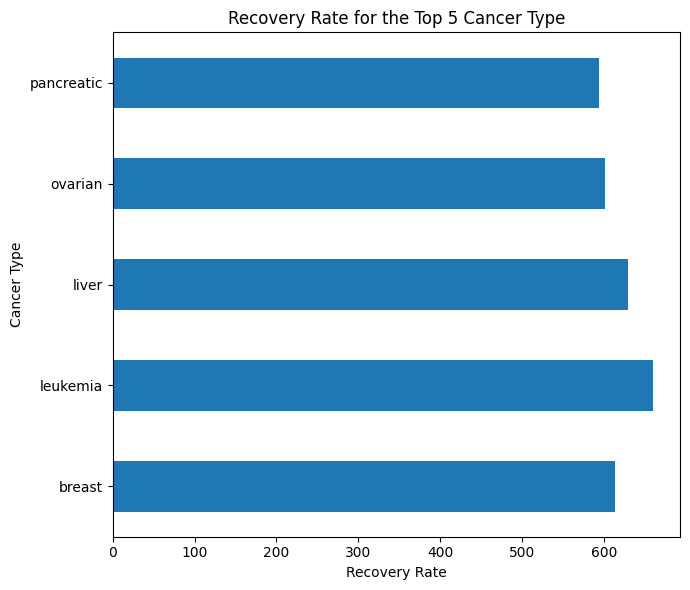

In [110]:
# To visualize the recovery rate
recovery_rate_top5_cancer_type.plot(kind='barh', figsize=(7,6))
plt.xlabel('Recovery Rate')
plt.ylabel('Cancer Type')
plt.title('Recovery Rate for the Top 5 Cancer Type')
plt.tight_layout()
plt.show()


##### Feature Engineering

In [ ]:
# Create Body Mass Index(BMI) from the weight and height columns

# Convert height to  metre(m)
df['Height'] = df['Height'] / 100

# Create BMI column
df['BMI'] = (df['Weight'] / (df['Height'] **2)).round(2)


In [112]:
df.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,...,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height,Diagnosis_Year,BMI
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,liver,II,Radiation,2020-12-04,...,Recovered,NaN,NaN,Non-Smoker,unknown,European,61,1.57,2020,24.75
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,leukemia,III,Surgery,2015-11-05,...,Recovered,NaN,NaN,Smoker,unknown,South Asian,80,1.75,2015,26.12
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,liver,III,Radiation,2018-08-03,...,Under Treatment,NaN,NaN,Non-Smoker,unknown,South Asian,50,1.75,2018,16.33
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,lung,III,Radiation,2022-03-13,...,Recovered,NaN,NaN,Former Smoker,unknown,African,44,1.55,2022,18.31
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,pancreatic,II,Chemotherapy,2020-02-29,...,Recovered,NaN,NaN,Former Smoker,unknown,East Asian,101,1.60,2019,39.45


In [113]:
df.shape

(10000, 22)

In [114]:
df['BMI'].value_counts()

BMI
29.76    36
28.73    31
23.53    31
29.41    30
21.80    30
         ..
16.44     1
39.95     1
10.87     1
14.43     1
32.65     1
Name: count, Length: 1779, dtype: int64

In [115]:
df['BMI'].unique()

array([24.75, 26.12, 16.33, ..., 35.34, 36.36, 34.25], shape=(1779,))

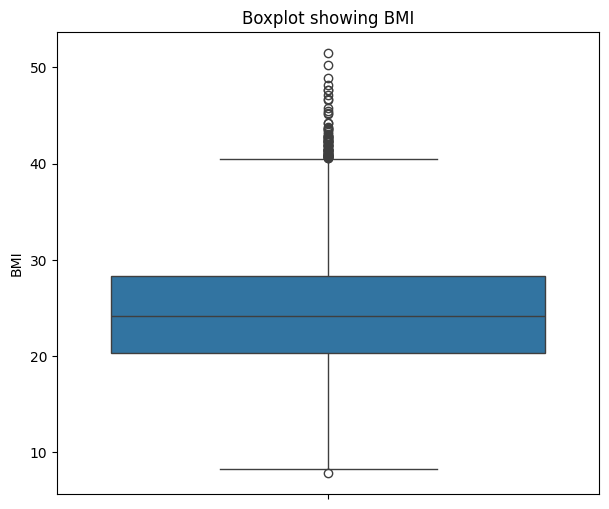

In [116]:
# Check for outlier in the new feature
plt.figure(figsize=(7,6))
sns.boxplot(data=df['BMI'])
plt.title('Boxplot showing BMI')
plt.show()

In [117]:
# Clip the outliers in the BMI column
Q1_bmi = df['BMI'].quantile(0.25)
Q3_bmi = df['BMI'].quantile(0.75)

IQR = Q3_bmi - Q1_bmi

lower_bound_bmi = Q1_bmi - 1.5*IQR
upper_bound_bmi = Q3_bmi + 1.5*IQR

# Clip the outliers
df['BMI'] = df['BMI'].clip(lower=lower_bound_bmi, upper=upper_bound_bmi)

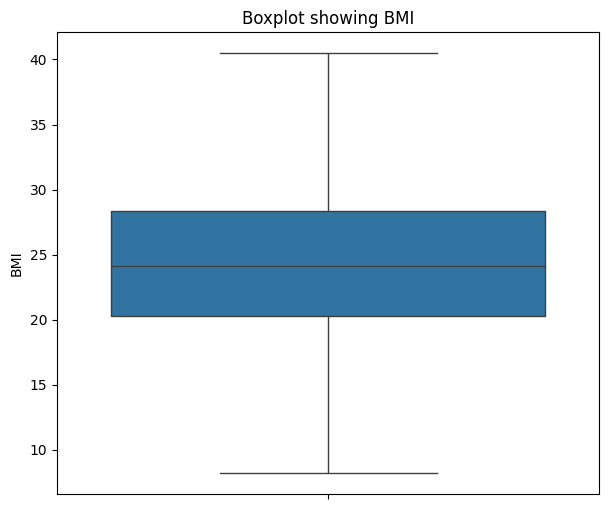

In [118]:
plt.figure(figsize=(7,6))
sns.boxplot(data=df['BMI'])
plt.title('Boxplot showing BMI')
plt.show()

##### Hypothesis Testing
 **For BMI:**

**Null Hypothesis (H₀):** BMI has no significant effect on cancer stages.

**Alternative Hypothesis (H₁):** BMI has a significant effect on cancer stages.

**For Age:**

**Null Hypothesis (H₀):** Age has no significant effect on cancer stages.

**Alternative Hypothesis (H₁):** Age has a significant effect on cancer stages.

##### Statistical Tests for BMI

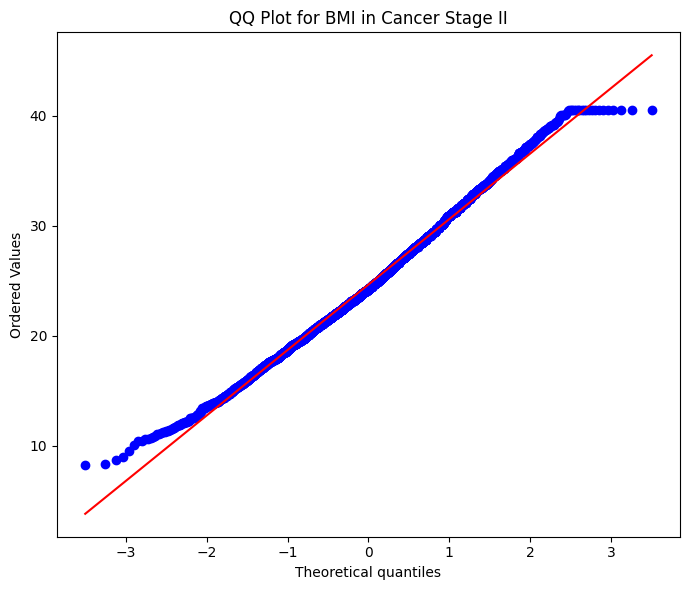


Shapiro Wilk Test for BMI in cancer stage II
W-Statistics = 0.99479, P_Value = 0.00000001
BMI is not Normally Distributed


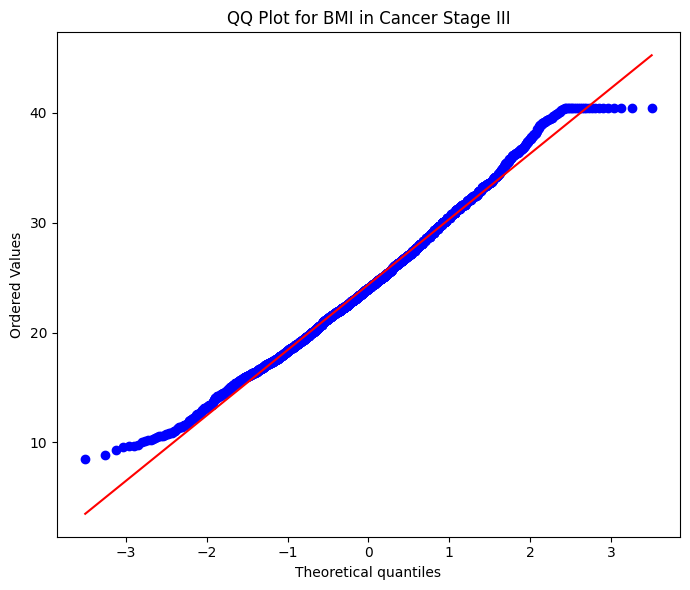


Shapiro Wilk Test for BMI in cancer stage III
W-Statistics = 0.99327, P_Value = 0.00000000
BMI is not Normally Distributed


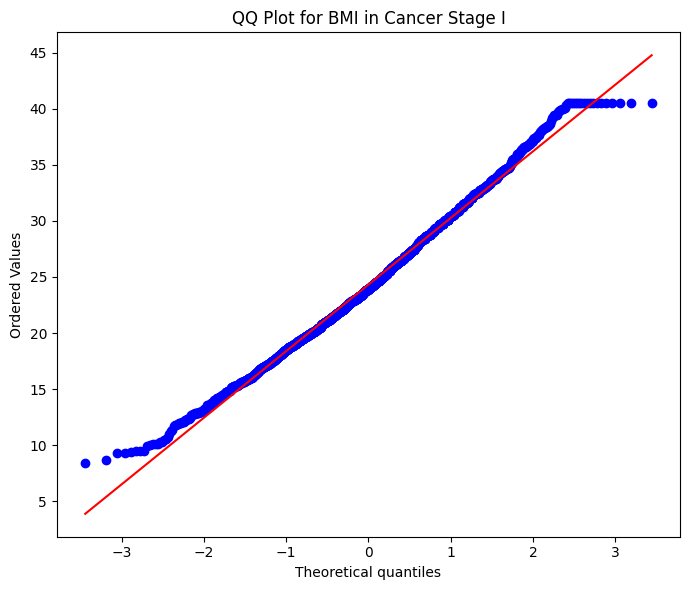


Shapiro Wilk Test for BMI in cancer stage I
W-Statistics = 0.99434, P_Value = 0.00000005
BMI is not Normally Distributed


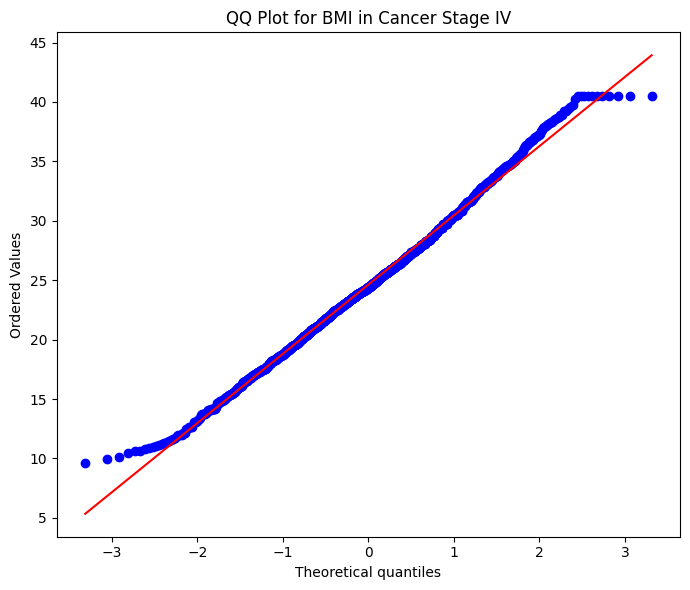


Shapiro Wilk Test for BMI in cancer stage IV
W-Statistics = 0.99554, P_Value = 0.00020173
BMI is not Normally Distributed


In [ ]:
# Test to check if BMI feature is Normally distributed
# Loop through the cancer_stage column

for stage in df['Cancer_Stage'].unique():
    bmi_values = df[df['Cancer_Stage'] == stage]['BMI']

    # QQ plot
    plt.figure(figsize=(7,6))
    stats.probplot(bmi_values, dist='norm', plot=plt)
    plt.title(f"QQ Plot for BMI in Cancer Stage {stage}")
    plt.tight_layout()
    plt.show()

    # Shapiro Wilk test to check for normal distribution
    w_stats, p_value = stats.shapiro(bmi_values)

    alpha = 0.05
    print(f"\nShapiro Wilk Test for BMI in cancer stage {stage}")
    print(f"W-Statistics = {w_stats:.5f}, P_Value = {p_value:.8f}")

    if p_value < alpha:
        print('BMI is not Normally Distributed')
    else:
        print('BMI is approximately Normally Distributed')

    

**Key Insights**
###### Although the W-statistics for all cancer stages indicate that the BMI distribution is close to a normal distribution (with values greater than 0.9), the p-values being less than 0.05 suggest that the BMI data does not follow a normal distribution. As a result, the Kruskal-Wallis Test will be used for hypothesis testing instead of the ANOVA Test.

##### Kruskal-Wallis Test

In [ ]:

# Filter the dataframe to get bmi values using list comprehension
bmi_group =[df[df['Cancer_Stage'] == stage]['BMI']
            for stage in df['Cancer_Stage'].unique()

]

stat, p_value = kruskal(*bmi_group)
print("Kruskal-Wallis H-test for BMI across Cancer Stages:")
print(f"H-statistic = {stat:.4f}, p-value = {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis. The relationship is statistically significant")
else:
    print("Fail to reject the Null Hypotesis. The relationship is not statistically significant")

Kruskal-Wallis H-test for BMI across Cancer Stages:
H-statistic = 7.0016, p-value = 0.0718
Fail to reject the Null Hypotesis. The relationship is not statistically significant


**Key Insight**
###### There is no statistically significant difference in BMI across the different cancer stages at the 5% significance level.

##### Statistical Tests for Age  Feature

###### From the histogram EDA Histogram, Age is fairly uniform in distribution

In [128]:
age_group =[df[df['Cancer_Stage'] == stage]['Age']
            for stage in df['Cancer_Stage'].unique()

]

stat, p_value = kruskal(*age_group)
print("Kruskal-Wallis H-test for BMI across Cancer Stages:")
print(f"H-statistic = {stat:.4f}, p-value = {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis. The relationship is statistically significant")
else:
    print("Fail to reject the Null Hypotesis. The relationship is not statistically significant")

Kruskal-Wallis H-test for BMI across Cancer Stages:
H-statistic = 1.1783, p-value = 0.7582
Fail to reject the Null Hypotesis. The relationship is not statistically significant


##### Hypothesis Testing
 **For Weight:**

**Null Hypothesis (H₀):** Weight has no significant effect on cancer stages.

**Alternative Hypothesis (H₁):** Weight has a significant effect on cancer stages.

**For Height:**

**Null Hypothesis (H₀):** Height has no significant effect on cancer stages.

**Alternative Hypothesis (H₁):** Height has a significant effect on cancer stages.

**Both Weight and Height follow a Normal (Gaussian) distribution**

##### Anova Test for the Weight Feature

In [ ]:


# To perform Anova test on weight
weight_group =[df[df['Cancer_Stage'] == stage]['Weight']
            for stage in df['Cancer_Stage'].unique()

]

w_stat, p_value_w = f_oneway(*weight_group)
print("Anova test for Weight across Cancer Stages:")
print(f"F-statistic = {w_stat:.4f}, p-value = {p_value_w:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis. The relationship is statistically significant")
else:
    print("Fail to reject the Null Hypotesis. The relationship is not statistically significant")

Anova test for Weight across Cancer Stages:
F-statistic = 1.8642, p-value = 0.1333
Fail to reject the Null Hypotesis. The relationship is not statistically significant


##### Anova Test for the Height Feature

In [130]:

# To perform Anova test on weight
height_group =[df[df['Cancer_Stage'] == stage]['Height']
            for stage in df['Cancer_Stage'].unique()

]

h_stat, p_value_h = f_oneway(*height_group)
print("Anova test for Height across Cancer Stages:")
print(f"F-statistic = {w_stat:.4f}, p-value = {p_value_w:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis. The relationship is statistically significant")
else:
    print("Fail to reject the Null Hypotesis. The relationship is not statistically significant")

Anova test for Height across Cancer Stages:
F-statistic = 1.8642, p-value = 0.1333
Fail to reject the Null Hypotesis. The relationship is not statistically significant
